# <center> <div class="alert alert-block alert-info"> <span style="color:crimson;"> Turkey Food Prices Predicting </cenetr>

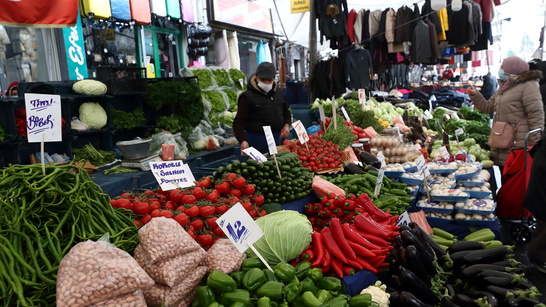

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
df1 = pd.read_csv("/kaggle/input/food-prices-in-turkey/train.csv")
df2 = pd.read_csv("/kaggle/input/food-prices-in-turkey/test.csv")
df1.head()

# <center> <div class="alert-block alert-info alert"> <span style="color:crimson;"> Exploratory Data Analysis </center>

In [ ]:
df = pd.concat([df1,df2],axis=0)

**Descriptive Statistics**

In [ ]:
df.describe()

**Observations**

* The given prices are between year of 2013 to 2021
* Minimum price is 0.25 and Maximum price is 166.90

In [ ]:
df.info()

# Data Cleaning
**Removing duplicates and checking null values**

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.shape

In [ ]:
df['ProductName'].value_counts()

In [ ]:
cols_to_repalce =  df['ProductName'].value_counts()[df['ProductName'].value_counts()<50].keys()
df['ProductName'].replace(cols_to_repalce ,['others' for i in range(6)],inplace=True)
df['ProductName'].value_counts()['others']

* collecting values less than 50 and making it as other

In [ ]:
product = df['ProductName'].value_counts(ascending=True)
px.bar(product)

In [ ]:
place = df['Place'].value_counts(ascending=True)
px.bar(place)

In [ ]:
year = df['Year'].value_counts(ascending=True)
px.bar(year)

* more data in 2019 and 2018 years

In [ ]:
px.histogram(df,x="ProductId")

In [ ]:
px.imshow(df.corr())

# <center> <div class="alert alert-block alert-info">  <span style="color:crimson;"> Data Preprocessing </center>

In [ ]:
df1 = df.drop(['ProductId','UmId'],axis=1)

In [ ]:
df1

In [ ]:
df2 = pd.get_dummies(df1[['Place', 'ProductName', 'UmName']])
df2

In [ ]:
df3 = pd.concat([df2, df[['Month', 'Year', 'Price']]], axis=1)
df3

In [ ]:
x = df3.drop('Price',axis=True)
y = df3['Price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit_transform(x_train)
ms.transform(x_test)

In [ ]:
x_train.shape, x_test.shape

# <center> <div class="alert alert-block alert-info">  <span style="color:crimson;"> Models </center>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

**LinearRegression**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)

lin_acc=r2_score(y_test,lin_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,lin_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,lin_reg.predict(x_test))*100))

**DecisionTreeRegressor**

In [ ]:
d_reg = DecisionTreeRegressor()
d_reg.fit(x_train,y_train)
y_pred = d_reg.predict(x_test)

d_acc=r2_score(y_test,d_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,d_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,d_reg.predict(x_test))*100))

**RandomForestRegressor**

In [ ]:
r_reg = RandomForestRegressor()
r_reg.fit(x_train,y_train)
y_pred = r_reg.predict(x_test)

r_acc=r2_score(y_test,r_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,r_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,r_reg.predict(x_test))*100))

**KNeighborsRegressor**

In [ ]:
k_reg = KNeighborsRegressor()
k_reg.fit(x_train,y_train)
y_pred = k_reg.predict(x_test)

k_acc=r2_score(y_test,k_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,k_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,k_reg.predict(x_test))*100))

**Support vector**

In [ ]:
s_reg = SVR()
s_reg.fit(x_train,y_train)
y_pred = s_reg.predict(x_test)

s_acc=r2_score(y_test,s_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,s_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,s_reg.predict(x_test))*100))

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear regression','Decision tree regression','RandomForestRegressor','KNeighborsRegressor','SVR'],
    'Score': [ lin_acc,d_acc, r_acc, k_acc, s_acc]
})

models.sort_values(by = 'Score', ascending = False)

In [ ]:
px.bar(models,x='Model',y='Score',color='Model')

**<center>Any Suggestions are accepted</center>**

# <center> <div class="alert alert-block alert-info">  <span style="color:crimson;"> Done </center>